In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
import timeit

In [12]:
start = timeit.default_timer()
M=400  
N=530000
delta_t=1.0e-4
delta_m=(1.0/M)
gamma = 5.0 / 3.0
step = int( N / 5.0 )
#SumUp = 0.0

In [13]:
ro=np.array([3.0 for i in range(M+1)])
U=np.array([0.0 for i in range(M+1)])
P=np.array([2.0 for i in range(M+1)])
E=np.array([1.0 for i in range(M+1)])
V=1.0/ro
r=np.array([0.0 for i in range(M+1)])

r_temp=[0.0 for i in range(M+1)]
U_temp=[0.0 for i in range(M+1)]
V_temp=[1.0 / 3 for i in range(M+1)]
ro_temp=[0.0 for i in range(M+1)]
E_temp=[0.0 for i in range(M+1)]
P_temp=[0.0 for i in range(M+1)]

In [14]:
@jit
def r_f_start(r):
    global delta_m
    for i in range(M):
        r[i+1]=(r[i] ** 3 + delta_m ) ** ( 1 / 3.0 )
    return r
r=r_f_start(r)

#print( r )
@jit
def u_f(U, r, P):
    global delta_t, delta_m
    U_new = np.zeros(M+1)
    for i in range(M-1):
        U_new[i + 1]=(U[i + 1]-((delta_t/delta_m)*(r[i + 1]**2)*(P[i + 1]-P[i])) )
    U_new[M]=U[M]+((delta_t/delta_m)*(r[M]**2)*(P[M-1]))
    return U_new
U=u_f(U,r, P)

#print( U )
@jit
def r_f(r,U):
    global delta_t
    r_new = np.zeros(M+1)
    for i in range(M):
        r_new[i + 1]=r[i + 1]+U[i + 1]*delta_t
    return r_new
r=r_f(r,U)

#print( r )
@jit
def V_f(r_new):
    global delta_m
    V_new = np.zeros(M+1)
    for i in range(M):
        V_new[i]=((r_new[i + 1]**3)-(r_new[i]**3))/3.0/delta_m
    return V_new
V=V_f(r)

#print( V )
@jit
def E_f( E, V_old, V_new ):
    global gamma
    E_new = np.zeros(M+1)
    for j in range(M):
        E_new[j]=E[j]*((V_new[j]/V_old[j])*((V_old[j]+((gamma-1.0)/2.0)*(V_old[j]-V_new[j]))/(V_new[j]-((gamma-1.0)/2.0)*(V_old[j]-V_new[j]))) )
    return E_new
E=E_f(E,V_temp,V)

#print( E )
@jit
def P_f(E,V):
    global gamma
    P_new = np.zeros(M+1)
    for i in range(M):
        P_new[i]=((gamma-1.0)*E[i])/V[i]
    return P_new
P=P_f(E,V)

#print( P )

In [15]:
U_temp=U
r_temp=r
V_temp=V
E_temp=E
P_temp=P
        
for i in range(1, N ):                        

    U_temp=u_f( U_temp,r_temp, P_temp )
        
    r_temp=r_f(r_temp, U_temp)
    
    V_temp=V_f(r_temp)
   
    E_temp=E_f(E_temp,V,V_temp)
    
    V=V_temp
    
    P_temp=P_f(E_temp,V_temp)
    
    #print( V_temp[-2] )
    
stop = timeit.default_timer()
total_time = stop - start

# output running time in a nice format.
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

print("Total running time: %d:%d:%d.\n"  % (hours, mins, secs))

            

Total running time: 0:0:8.



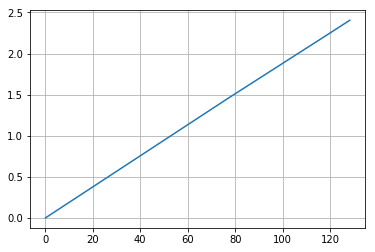

In [16]:
plt.plot(r_temp[:-1],U_temp[:-1])
plt.grid()
plt.show()

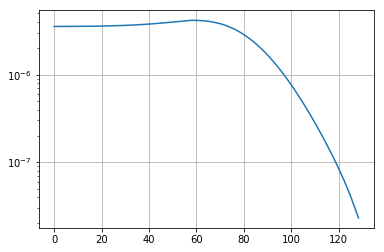

In [17]:
plt.yscale( 'log' )
plt.plot(r_temp[:-1],1.0 / V_temp[:-1])
plt.grid()
plt.show()

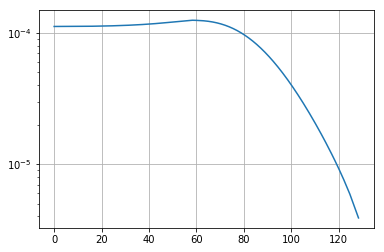

In [18]:
plt.yscale( 'log' )
plt.plot(r_temp[:-1],E_temp[:-1])
plt.grid()
plt.show()

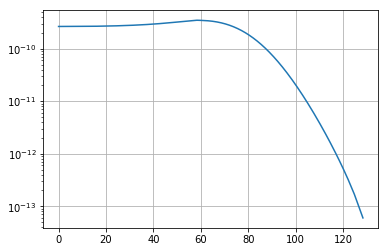

In [19]:
plt.yscale( 'log' )
plt.plot(r_temp[:-1],P_temp[:-1])
plt.grid()
plt.show()